<a href="https://colab.research.google.com/github/APARECIDADUTRA/BestSeller-Books-of-Amazon.csv/blob/main/BestSeller_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv('BestSeller Books of Amazon.csv')

**Verificação do formato dos dados (quantidade de linhas, quantidade de colunas)**


In [6]:
df.shape

(400, 4)

**Leitura de dados**

In [5]:
df.head()


,Book Name,Author Name,Rating,Price
0,Maths Concept King All Formulas and Theorum | ...,Gagan Pratap Sir,4.7,₹239.00
1,BlackBook of English Vocabulary May 2024 by Ni...,Nikhil Gupta,4.5,₹299.00
2,Atomic Habits : the life-changing million-copy...,James Clear,4.6,₹476.00
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,₹399.00
4,Lucent General Knowledge - New Reduced Price E...,Binay Karna,4.4,₹209.00


**Verificação dos tipos de variáveis contidas no dataframe**


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book Name    400 non-null    object 
 1   Author Name  400 non-null    object 
 2   Rating       400 non-null    float64
 3   Price        400 non-null    object 
dtypes: float64(1), object(3)
memory usage: 12.6+ KB


**# Função para corrigir os valores na coluna Depression State **


In [12]:
def corrigir_coluna(valor):
    try:
        if '\t' in valor:
            return valor.replace('\t', '')
        elif '2\t' in valor:
            return valor.replace('2\t', 'No')
        elif '5\t' in valor:
            return valor.replace('5\t', 'No')
        else:
            return valor
    except:
        return valor

In [16]:
df.head()

,Book Name,Author Name,Rating,Price
0,Maths Concept King All Formulas and Theorum | ...,Gagan Pratap Sir,4.7,₹239.00
1,BlackBook of English Vocabulary May 2024 by Ni...,Nikhil Gupta,4.5,₹299.00
2,Atomic Habits : the life-changing million-copy...,James Clear,4.6,₹476.00
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,₹399.00
4,Lucent General Knowledge - New Reduced Price E...,Binay Karna,4.4,₹209.00


**Diversos valores nulos devido à erro nos dados originais de entrada**


In [17]:
df.isna().sum()

Book Name      0
Author Name    0
Rating         0
Price          0
dtype: int64

Remoção de valores nulos


In [18]:
df.dropna(inplace=True, ignore_index=True)

In [19]:
df.tail()

,Book Name,Author Name,Rating,Price
395,Shrimad Bhagwat Geeta Yatharoop (Hindi),A.C. Bhaktivendanta Swami Prabhupada,4.8,₹200.00
396,Educart CBSE Class 10 One Shot Question Bank 2...,Prashant Kirad,4.5,"₹1,357.00"
397,How to Win Friends and Influence People : Orig...,Dale Carnegie,4.5,₹135.00
398,RAM C/O ANANDHI,AKHIL P DHARMAJAN,4.4,₹306.00
399,SSC TCS PYQs Mathematics Chapterwise & Typewis...,Kiran Institute of Career Excellence,4.1,₹548.00


In [20]:
df.shape

(400, 4)

Renomear a coluna Number removendo o espaço em branco

In [21]:
df.rename(columns={'Number ':'Number'}, inplace=True)

In [22]:
df.columns

Index(['Book Name', 'Author Name', 'Rating', 'Price'], dtype='object')

Salvar o dataframe em formato Excel

In [23]:
#df.to_excel('./Datasets/Depression_Corrigida.xlsx', engine='openpyxl', index=False)

In [25]:
df.drop('Book Name', axis=1).describe()

,Rating
count,400.000000
mean,4.460000
std,0.188916
min,3.600000
25%,4.400000
50%,4.500000
75%,4.600000
max,4.800000


**Análise gráfica**

<Axes: xlabel='Rating', ylabel='count'>

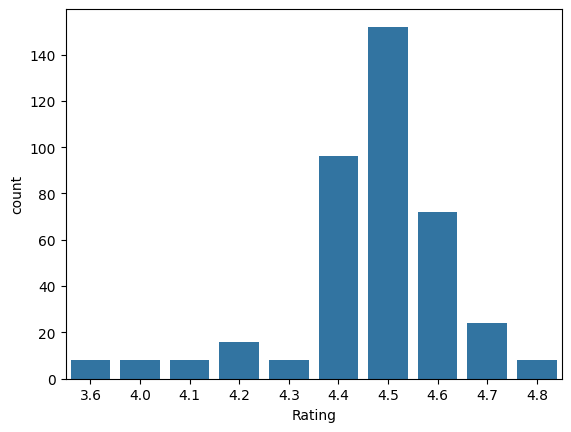

In [27]:
sns.countplot(data=df, x='Rating')

**Função de remoção de outliers - implementação pelo método interquartil com a biblioteca scipy**

In [28]:
def remover_outliers_interquartil(dados, variavel):

    Q1 = dados[variavel].quantile(q=0.25)
    Q3 = dados[variavel].quantile(q=0.75)
    IQR = dados[variavel].apply(stats.iqr)

    dados_limpos = dados[~((dados[variavel] < (Q1-1.5*IQR)) | (dados[variavel] > (Q3+1.5*IQR)))].copy()
    dados_limpos.reset_index(drop=True, inplace=True)

    return dados_limpos

Leitura dos dados

In [30]:
df=pd.read_csv('BestSeller Books of Amazon.csv')

In [31]:
df.head()

,Book Name,Author Name,Rating,Price
0,Maths Concept King All Formulas and Theorum | ...,Gagan Pratap Sir,4.7,₹239.00
1,BlackBook of English Vocabulary May 2024 by Ni...,Nikhil Gupta,4.5,₹299.00
2,Atomic Habits : the life-changing million-copy...,James Clear,4.6,₹476.00
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,₹399.00
4,Lucent General Knowledge - New Reduced Price E...,Binay Karna,4.4,₹209.00


Describe (comando para descrever estatisticamente o conjunto de dados)

In [34]:
df.drop('Book Name', axis=1).describe()

,Rating
count,400.000000
mean,4.460000
std,0.188916
min,3.600000
25%,4.400000
50%,4.500000
75%,4.600000
max,4.800000


Verificar a moda (valores que mais ocorrem)

In [37]:
df['Author Name'].value_counts()

Author Name
Wonder House Books                       56
Maple Press                              24
MTG Editorial Board                      16
Joseph Murphy                            16
Dale Carnegie                            16
Gagan Pratap Sir                          8
Chitra Banerjee Divakaruni                8
Oswaal Editorial Board                    8
Ichiro Kishimi and Fumitake Koga          8
Chetan Bhagat                             8
Dr. parul Goel Ranjan , Abhshek Gupta     8
Sudha Murty                               8
Susmita Dhar Kriti Arora                  8
Robert T. Kiyosaki                        8
Library Mindset                           8
Prerna Kain Srishti Agarwal               8
R. S Aggarwal                             8
A.C. Bhaktivendanta Swami Prabhupada      8
Prashant Kirad                            8
AKHIL P DHARMAJAN                         8
Sank Magic                                8
Team Pegasus                              8
KVS Madaan          

In [38]:
df['Rating'].value_counts()

Rating
4.5    152
4.4     96
4.6     72
4.7     24
4.2     16
3.6      8
4.0      8
4.3      8
4.8      8
4.1      8
Name: count, dtype: int64

In [42]:
df[df['Book Name'] ==  86]

,Book Name,Author Name,Rating,Price


In [51]:
df.head()

,Book Name,Author Name,Rating,Price
0,Maths Concept King All Formulas and Theorum | ...,Gagan Pratap Sir,4.7,₹239.00
1,BlackBook of English Vocabulary May 2024 by Ni...,Nikhil Gupta,4.5,₹299.00
2,Atomic Habits : the life-changing million-copy...,James Clear,4.6,₹476.00
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,₹399.00
4,Lucent General Knowledge - New Reduced Price E...,Binay Karna,4.4,₹209.00


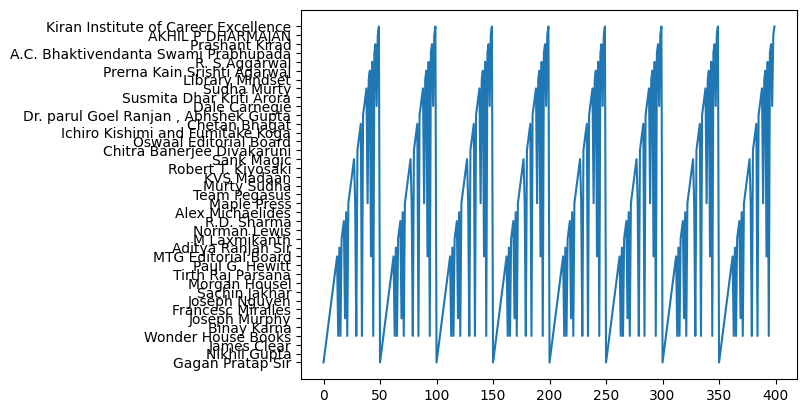

In [54]:
plt.plot(df['Author Name'])

<Axes: xlabel='Author Name', ylabel='Count'>

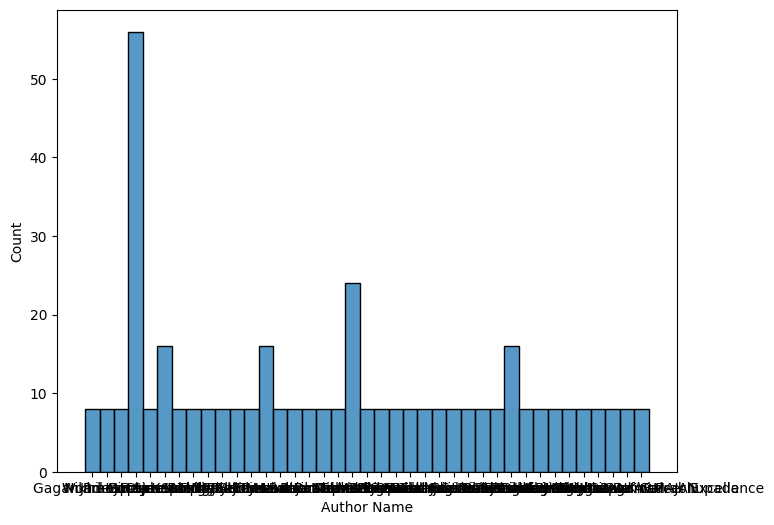

In [59]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Author Name')

<Axes: xlabel='Book Name', ylabel='Count'>

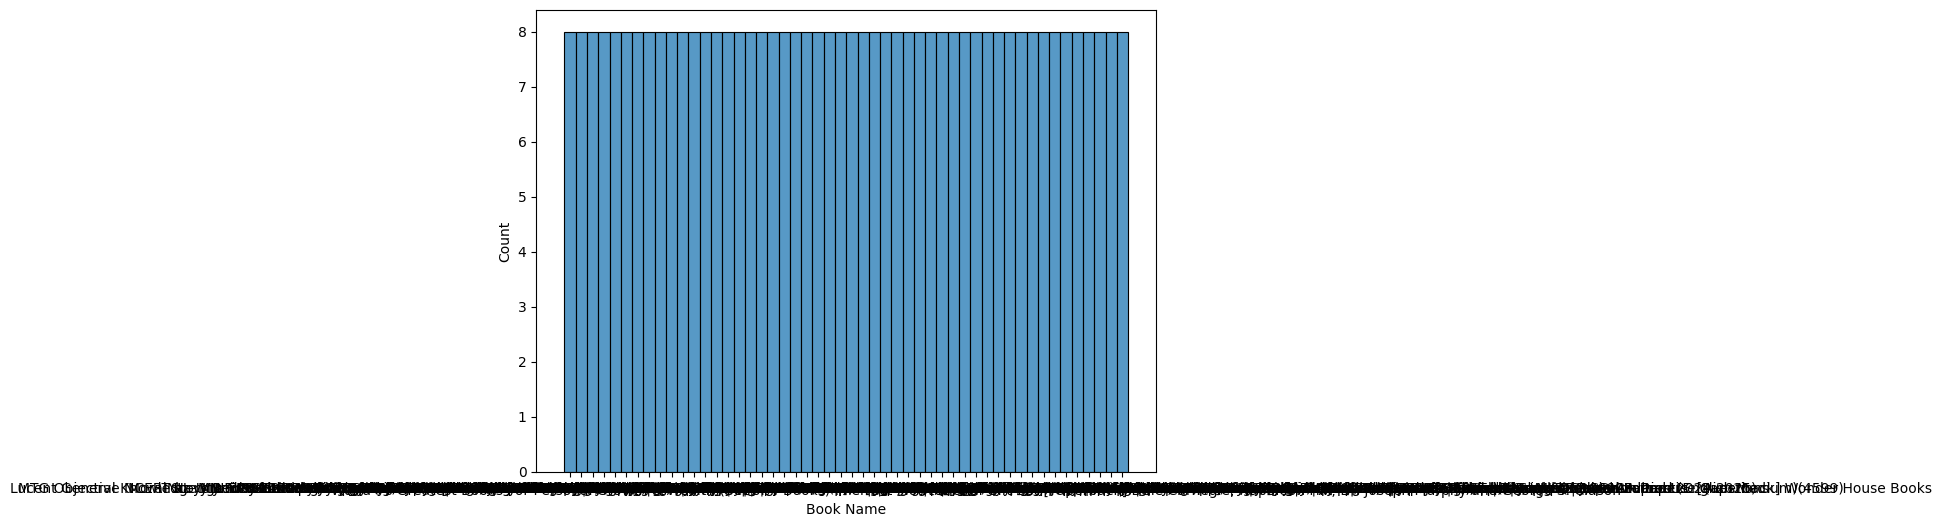

In [60]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Book Name')

<Axes: ylabel='Book Name'>

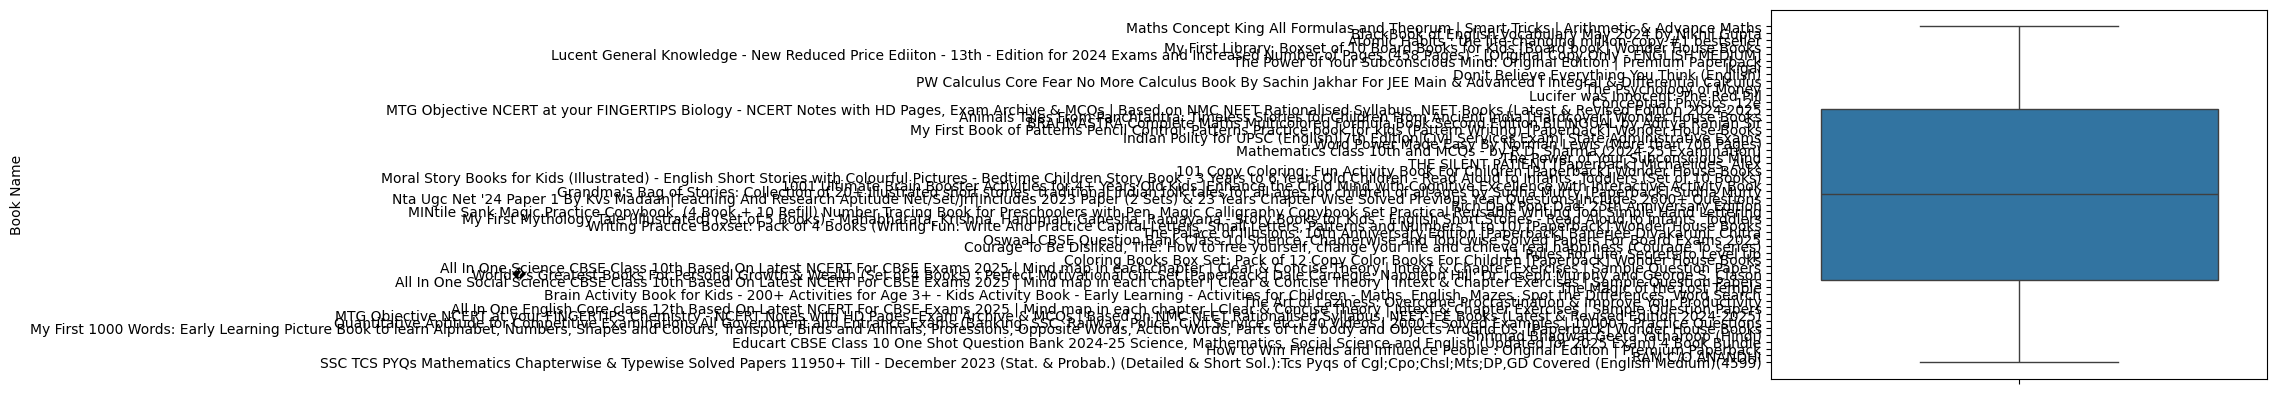

In [66]:
sns.boxplot(data=df, y='Book Name')

In [69]:
df['Book Name'].head(20)

0     Maths Concept King All Formulas and Theorum | ...
1     BlackBook of English Vocabulary May 2024 by Ni...
2     Atomic Habits : the life-changing million-copy...
3     My First Library: Boxset of 10 Board Books for...
4     Lucent General Knowledge - New Reduced Price E...
5     The Power of Your Subconscious Mind: Original ...
6                                                Ikigai
7          Don't Believe Everything You Think (English)
8     PW Calculus Core Fear No More Calculus Book By...
9                               The Psychology of Money
10                   Lucifer was Innocent: The Red Pill
11                              Conceptual Physics, 12e
12    MTG Objective NCERT at your FINGERTIPS Biology...
13    Animals Tales From Panchtantra: Timeless Stori...
14    BRAHMASTRA Complete Maths Multicolored Formula...
15    My First Book of Patterns Pencil Control: Patt...
16    Indian Polity for UPSC (English)|7th Edition|C...
17    Word Power Made Easy By Norman Lewis (More

In [70]:
df['Book Name'].value_counts()

Book Name
Maths Concept King All Formulas and Theorum | Smart Tricks | Arithmetic & Advance Maths                                                                                                                                                              8
All In One Social Science CBSE Class 10th Based On Latest NCERT For CBSE Exams 2025 | Mind map in each chapter | Clear & Concise Theory | Intext & Chapter Exercises | Sample Question Papers                                                        8
MINtile Sank Magic Practice Copybook, (4 Book + 10 Refill) Number Tracing Book for Preschoolers with Pen, Magic Calligraphy Copybook Set Practical Reusable Writing Tool Simple Hand Lettering                                                       8
My First Mythology Tale (Illustrated) (Set of 5 Books) - Mahabharata, Krishna, Hanuman, Ganesha, Ramayana - Story Books for Kids - English Short Stories - Read Aloud to Infants, Toddlers                                                           8
Wr

Método que faz a binarização dos dados (variáveis dummies)

In [86]:
df.head()

""
0
1
2
3
4
